# Exploring Projec1 ideas

In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import geoapify_key

In [3]:
#linear regression function
def get_regress(x,y, title, xlabel, ylabel):
   plt.scatter(x=x,y=y)
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
   regress_values = x * slope + intercept
   line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
   plt.plot(x,regress_values, color='red')
   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   if sum(x) > 0:
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   else: 
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   print(f'The r-squared is: {rvalue**2}')
   print(f'The r-value is {rvalue}')
   print(f'The p-value is {pvalue}')
   print(f'The stderr is {stderr}')
   
   plt.show()

   

## DataFrame Preparation

In [2]:
# Import cities file as DataFrame
mp_df =pd.read_csv("../Resources/chicago_public_health.csv")

raw_df = mp_df.copy()
mp_df.head()


,index,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [4]:
# List of Regions with corresponding Community areas for data manipulation
RA=[{"Far North Side":["Rogers Park","West Ridge","Uptown","Lincoln Square","O'Hare","Edgewater","North Park","Albany Park","Edison Park","Norwood Park","Jefferson Park","Forest Glen"]},
{"Northwest Side":["North Center","Lake View","Lincoln Park","Avondale","Logan Square","Hermosa","Portage Park","Irving Park","Dunning","Montclaire","Belmont Cragin"]},
{"North Side":["Near North Side","West Town","Humboldt Park","Austin"]},
{"Central":["Loop","Near South Side","Near West Side"]},
{"West Side":["East Garfield Park","West Garfield Park","North Lawndale","South Lawndale","Lower West Side"]},
{"South Side":["Greater Grand Crossing","Armour Square","Douglas","Oakland","Fuller Park","Grand Boulevard","Kenwood","Washington Park","Hyde Park","Woodlawn","South Shore"]},
{"Southwest Side":["Bridgeport","New City","West Elsdon","Gage Park","Brighton Park","McKinley Park","Archer Heights","West Lawn","Chicago Lawn","Garfield Ridge","Clearing","West Englewood","Englewood"]},
{"Far Southwest Side":["Washington Heights","Auburn Gresham","Ashburn","Beverly","Mount Greenwood","Morgan Park"]},
{"Far Southeast Side":["Chatham","Avalon Park","South Chicago","Burnside","Calumet Heights","Roseland","Pullman","South Deering","East Side","West Pullman","Riverdale","Hegewisch"]}]

#Add a new column for Region
raw_df["Region"]=""

#Populate the new column - Region

for i in range(mp_df.shape[0]):
    cma=mp_df.loc[i,"Community Area Name"]
    for r in range(len(RA)):
        k=list(RA[r])[0]
        if cma in RA[r][k]:
            mp_df.loc[i,"Region"]=k
            #print(cma,k)
            
      
        

mp_df.head()

,index,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,Region
0,0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,...,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5,Far North Side
1,1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,...,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9,Far North Side
2,2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,...,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7,Far North Side
3,3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,...,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8,Far North Side
4,4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,...,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5,Northwest Side


In [5]:
column_to_move = mp_df.pop('Region')
mp_df.insert(2, 'Region', column_to_move)


In [6]:
pd.set_option('display.max_columns', None)
mp_df.head()


,index,Community Area,Region,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Firearm-related,Infant Mortality Rate,Lung Cancer,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,0,1,Far North Side,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,1,2,Far North Side,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,60.5,3.7,5.1,36.0,14.2,34.7,331.4,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,2,3,Far North Side,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,80.0,4.6,6.5,50.5,25.2,41.7,353.7,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,3,4,Far North Side,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,55.4,6.1,3.8,43.1,27.6,36.9,273.3,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,4,5,Northwest Side,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,49.8,1.0,2.7,42.4,15.1,41.6,178.1,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [7]:
lead_poison_df = raw_df.loc[(~raw_df['Childhood Lead Poisoning'].isna()) & (~raw_df['Below Poverty Level'].isna())]

lead_poison_df = lead_poison_df.sort_values(by='Community Area Name').reset_index()





The r-squared is: 0.21706084114927598
The r-value is 0.46589788704100815
The p-value is 2.2225750905747133e-05
The stderr is 0.007541439001666817


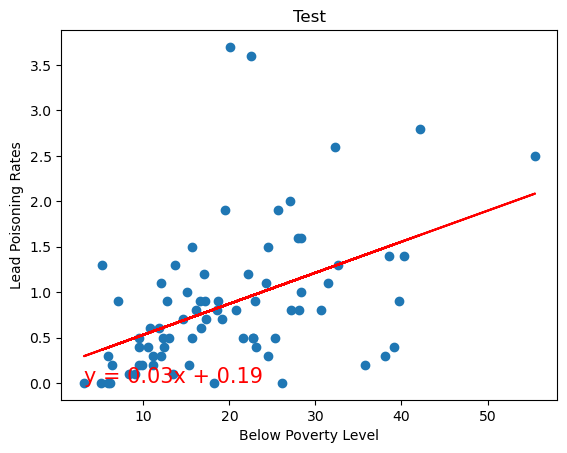

In [8]:
#Do higher rates of poverty/lower average income result in higher prevalence of childhood lead poisoning?
get_regress(lead_poison_df['Below Poverty Level'],lead_poison_df['Childhood Lead Poisoning'],'Test','Below Poverty Level','Lead Poisoning Rates')


The r-squared is: 0.41516976152410107
The r-value is 0.6443366833605713
The p-value is 2.5694937327298464e-10
The stderr is 0.16511945450648038


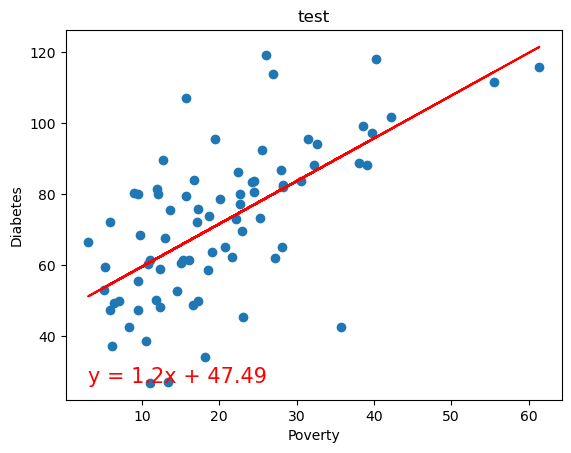

In [9]:
#Do certain socioeconomic brackets have a higher risk of certain health markers? Cancer/Cardiovascular Disease/Diabetes
disease_df = raw_df.loc[(~raw_df['Below Poverty Level'].isna()) & (~raw_df['Diabetes-related'].isna())]



get_regress(disease_df['Below Poverty Level'], disease_df['Diabetes-related'],'test','Poverty','Diabetes')

The r-squared is: 0.36224641349477216
The r-value is -0.6018690999667388
The p-value is 7.055262629933287e-09
The stderr is 0.00013257909326109304


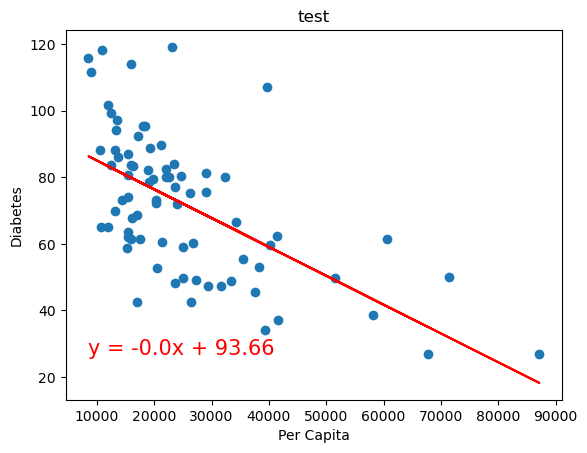

In [10]:
#Do certain socioeconomic brackets have a higher risk of certain health markers? Cancer/Cardiovascular Disease/Diabetes
disease_df = raw_df.loc[(~raw_df['Per Capita Income'].isna()) & (~raw_df['Diabetes-related'].isna())]



get_regress(disease_df['Per Capita Income'], disease_df['Diabetes-related'],'test','Per Capita','Diabetes')

In [11]:
mp_df.groupby("Region")[["Tuberculosis","Crowded Housing"]].mean()

,Tuberculosis,Crowded Housing
Region,,
Central,8.533333,2.400000
Far North Side,8.133333,4.125000
Far Southeast Side,5.175000,3.966667
Far Southwest Side,2.883333,2.000000
North Side,6.150000,5.225000
Northwest Side,6.245455,4.545455
South Side,8.272727,3.345455
Southwest Side,7.030769,7.900000
West Side,9.740000,10.320000


In [12]:
Region_df= mp_df.groupby("Region")[["Teen Birth Rate","No High School Diploma"]].mean()
Region_TPE= Region_df.reset_index()
Region_TPE.sort_values(by="No High School Diploma", inplace= True, ascending=False)
Region_TPE.reset_index().drop("index",axis=1)

,Region,Teen Birth Rate,No High School Diploma
0,West Side,88.700000,37.160000
1,Southwest Side,60.961538,33.900000
2,Northwest Side,41.254545,20.254545
3,Far Southeast Side,63.516667,20.041667
4,South Side,49.645455,20.018182
5,North Side,60.725000,19.650000
6,Far North Side,22.700000,14.891667
7,Far Southwest Side,42.116667,12.316667
8,Central,29.633333,7.233333


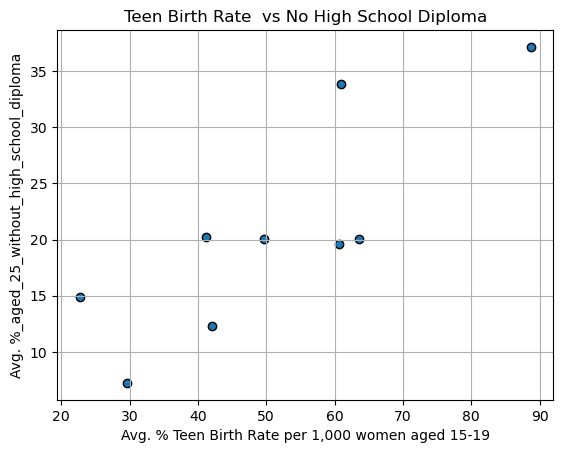

In [13]:
# Build scatter plot for Teen Birth Rate  vs Lack of High school diploma
x_values = Region_df['Teen Birth Rate']
y_values = Region_df['No High School Diploma']
plt.scatter(x_values,y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Avg. % Teen Birth Rate per 1,000 women aged 15-19')
plt.ylabel('Avg. %_aged_25_without_high_school_diploma')
plt.title(f"Teen Birth Rate  vs No High School Diploma")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

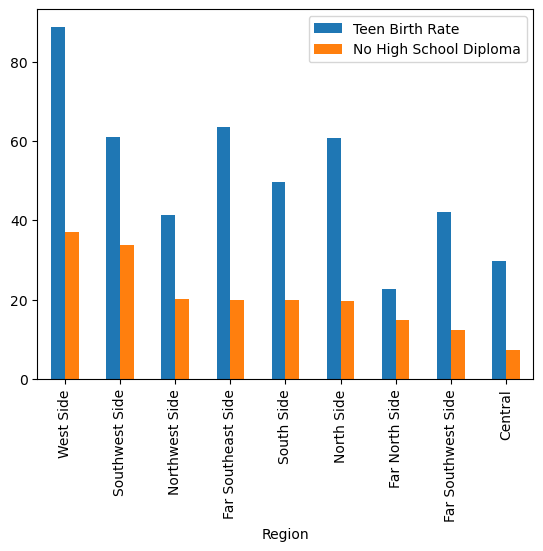

In [14]:

Region_TPE.plot(kind="bar",x="Region",y=["Teen Birth Rate","No High School Diploma"])
plt.show()


<Axes: xlabel='Community Area Name'>

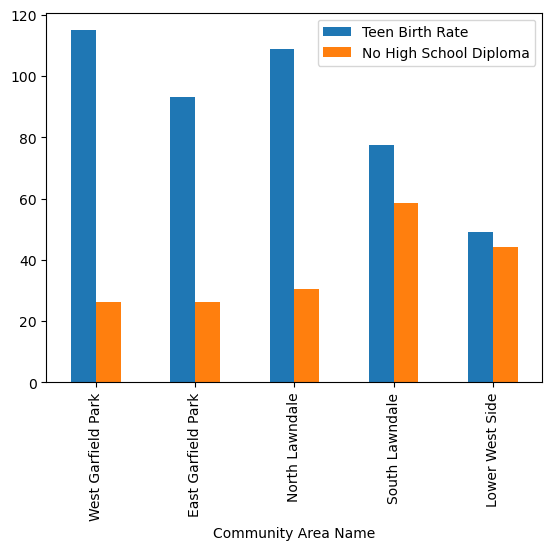

In [15]:
#mp_df.head()
WestSide_TPE= mp_df.loc[mp_df["Region"]=="West Side"][["Community Area Name","Teen Birth Rate","No High School Diploma"]]
WestSide_TPE.reset_index().drop("index",axis=1)
WestSide_TPE.plot(kind="bar",x="Community Area Name",y=["Teen Birth Rate","No High School Diploma"])